In [1]:
import numpy as np

np.random.seed(0)

In [2]:
SIGMA, ALPHA = 1, 0.8
BETA = 0.5

X1 = np.random.normal(0,(SIGMA**2)/(1-(ALPHA**2)))

n_samples = 500

V = np.random.normal(0,1,n_samples)
W = np.random.normal(0,1,n_samples)


X = np.zeros(n_samples)
Y = np.zeros(n_samples)
X[0] = X1
for i in range(n_samples):
    try:
        X[i+1] = ALPHA*X[i] + SIGMA * V[i]
    except IndexError:
        pass
    Y[i] = BETA*np.exp(X[i]/2)*W[i]

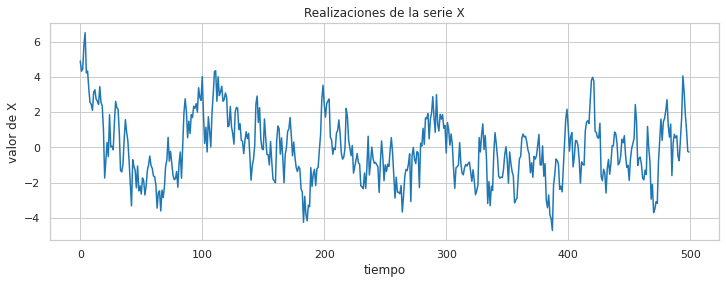

In [3]:
from plot import plot_series

plot_series(X,'X')

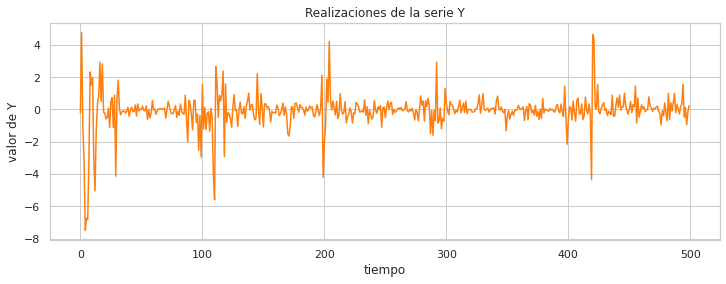

In [4]:
plot_series(Y,'Y','tab:orange')

In [ ]:
from scipy.stats import norm

class SequentialImportanceSampling:
    def __init__(self,N):
        """Inicialización de la clase
        
        Argumentos
        ----------
                
            N: int
                numero de particulas por paso
                
        """
        self.N = N
        self.particle_sequence = []
        self.weights_sequence = []
        self._observed = []
        self._medias = []

    def update_weights(self,y_obs):
        last_weights = self.weights_sequence[-1]
        assert y_obs.shape[0] == last_weights.shape[0]
        sum_w, new_weights = 0, []
        for i, w in enumerate(last_weights):
            particula = self.particle_sequence[-1][i]
            new_w = w * np.exp(-0.5*(np.exp(-1*particula)*y_obs[i]**2 + particula))
            sum_w += new_w
            new_weights.append(new_w)
        new_weights_norm = np.array([w/sum_w for w in new_weights])
        self.weights_sequence.append(new_weights_norm)
    
    def sample_particles(self):
        raise NotImplementedError

In [ ]:
class ParticleFilter1D(SequentialImportanceSampling):
    def observe(self,y_obs):
        "Observa una realización de la variable observable Y"
        self._observed.append(y_obs)

    def iterar(self):
        "Método que lleva a cabo un paso del algoritmo"
        particulas = self.sample_particles()
        pesos = self.update_weights(self._observed[-1])
        self._medias.append(np.average(particulas,weights=pesos))
    
    # métodos getter
    @property
    def medias(self):
        return np.array(self._medias)

In [ ]:
class ParticleFilter1DStochasticVolatility(ParticleFilter1D):
    """Clase que hereda de un filtro de particulas genérico (ParticleFilter1D)
    
    Específico para un modelo de volatilidad estocástica"""
    def set_initial_particles(self,mu,sigma):
        """
        Samplea segun una distribución normal N(mu,sigma)
        
        Arguments
        ----------
        
            mu: float
                media de la normal a considerar

            sigma: float
                desviacion estandar (sigma^2 en estricto rigor)

        """
        self.particle_sequence.append(norm.rvs(mu,sigma,size=self.N))
        self.weights_sequence.append(np.ones(self.N)/self.N)

    @staticmethod
    def sample_gaussian(mu,sigma):
        new_particle = norm.rvs(mu,sigma,size=1)
        return new_particle

    def sample_particles(self):

        new_particles = None

        self.particle_sequence.append(new_particles)